# Assignment 6: Facial Classification Using SVMs and PCA

### Dimensionality Reduction on Data Using PCA

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces', a novel way (at the time) to classify images of faces using dimensionality reduction techniques. The main motivation behind using PCA in eigenfaces was to remove noise from high dimensional data. After transforming the original images, they would train a classifier on these **eigenfaces**.

In this assignment, we are going to try replicate the experiment. To get you started, we'll be going through an example using a famous public dataset, the [LFW Dataset](http://vis-www.cs.umass.edu/lfw/).

We have loaded the face dataset for you below (As for other famous datasets, sklearn has graciously included this one in their library). 

The task can be divided in two main steps, described below: 

- **Feature Extraction -** Use PCA to reduce the number of features required to describe each image (feature extraction step). How many features are required to describe each image while retaining necessary information to describe the image?


- **Classification on Extracted Features (Eigenfaces) -** Use a classification algorithm of your choice to train a classifier on the dataset. You may use classification models from sklearn (Hint: are we working on data with high dimensionality? Do we have a few training samples or many training samples? Use [this link](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for some tips!)

###### Import some packages for plotting, matrix operations, etc.

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

###### Run the cell below, uncommenting the statement that downloads the dataset.

In the ```fetch_lfw_people``` method, notice that we choose to resize the image and have a minimum of 70 training instances per person. How many features are there per sample? (**Hint:** Look at the shape of each sample below)

In [2]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Plot an example image below.

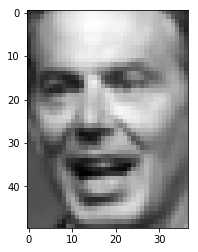

In [3]:
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

###### 1) Split the data into train/test splits using a 75/25 split (You may use the sci-kit learn module)

In [4]:
### YOUR CODE HERE - Split into train/test set
train_X, test_X, train_y, test_y= train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

######  Compute the principal components on the LFW dataset

Use principal component analysis to compute appropriate **eigenfaces** on the LFW dataset. As described from the lecture, this is an **unsupervised** learning task for:
 - feature extraction
 - dimensionality reduction

###### 2) Data Preprocessing

Use the ```StandardScaler``` class from sklearn to scale data, and to subtract the mean from each sample [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

**NOTE:** Remember to run **ALL** preprocessing steps on training data on your test data before making a prediction.

In [5]:
### YOUR CODE HERE - Preprocess training data using the StandardScaler module
scaler=StandardScaler()
train_X_proc=scaler.fit_transform(train_X,train_y)
### YOUR CODE HERE - Preprocess test data using the StandardScaler module
test_X_proc=scaler.fit_transform(test_X,test_y)

Print out some values of the first preprocessed instance (rename ```X_train``` if you changed the variable name, or else the following code will throw an error).

In [6]:
print("Scaled pixel values of first sample in train_X_proc: {}".format(train_X_proc))

Scaled pixel values of first sample in train_X_proc: [[-1.4192569  -1.0687199   0.10127599 ...  1.0204661   1.1180596
   0.8154103 ]
 [-0.8563927  -0.91340744 -0.7265143  ... -0.8636186  -0.68733686
  -0.39528954]
 [-0.15103085 -0.01111671 -0.1593247  ... -0.9663869  -0.87760115
  -0.84509814]
 ...
 [-0.30065304 -0.2329915  -0.8338205  ... -0.1271128   0.2217037
   0.8112064 ]
 [ 1.0245718   1.1500279   1.044037   ...  1.6927418   1.7649583
   1.8453459 ]
 [ 0.38333404  0.29211208  0.13193476 ...  1.0846963   1.4267107
   1.5805053 ]]


###### 3) Compute PCA, specifying the number of components to compute PCA on.

How do we choose the number of principal components? Choose different values of k, and compute the principal components for each iteration (**Hint:** run a for loop over different values of k). Specifically:

- Create an empty list that will store values of variance per component.
- Iterate from 1 component to k components, transforming the original images in your training set to their principal components (**Hint:** use the ```fit_transform``` method  found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA))
- In the same loop, once you've computed the PCA for ```n_components=k```, store the **last element** of the ```pca.explained_variance_ratio_``` attribute in the list you created.
- Plot the **percentage of variance** explained by every vector in descending order.

Your plot should looking something like this (just a bar chart will suffice): [![PCA](https://miro.medium.com/max/700/1*JLAVaWW5609YZoJ-NYkSOA.png)](https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2)

In [7]:
### YOUR CODE HERE - Specify a range of values of k to check, e.g. values = range(1, 10)
values=range(1,11)
### YOUR CODE HERE - Loop over values of k, apply PCA with k components to transform your training data
variances=[]
for k in values:
    pca=PCA(n_components=k)
    # Find k components with highest variance
    train_X_trans=pca.fit_transform(train_X_proc)
    # Store last element of explained variance ratio in list
    variances.append(pca.explained_variance_ratio_[-1]*100)

###### 4) Plot variance fraction explained by each component/vector in descending order.

<BarContainer object of 10 artists>

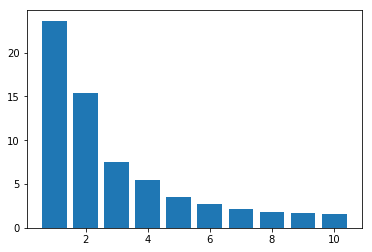

In [8]:
### YOUR CODE HERE - Plot variance explained by every vector in descending order
plt.bar(values,variances)

###### 5) Choose a specific number of components to use when applying PCA.

Now that you have a clearer picture of how many components are required to describe the variance in a given image, apply PCA to the training set, using the sklearn API:
```
# Some example code on how to find PCA of data

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# How to reshape PCA components to plot later (h, w defined above)

eigenfaces = pca.components_.reshape((n_components, h, w))
```
Compute eigenfaces, then project the input data onto the orthonormal based on the example code provided above.

In [9]:
### YOUR CODE HERE - Find eigenfaces from training data
## I choose k=100
pca2=PCA(n_components=200)
pca2.fit(train_X_proc)
train_X_trans=pca2.transform(train_X_proc)
### YOUR CODE HERE - Project input data on the eigenfaces orthonormal basis using the transform command
eigenfaces=pca2.components_.reshape((200,h,w))
#pca2.fit(test_X_proc)
test_X_trans=pca2.transform(test_X_proc)

In [10]:
train_X_trans.shape,eigenfaces.shape, pca.components_.shape, train_y.shape

((966, 200), (200, 50, 37), (10, 1850), (966,))

In [11]:
test_y.shape, test_X_trans.shape

((322,), (322, 200))

###### 6) Train an SVM classification model on the transformed data 

Find an appropriate SVM model to classify our transformed data on using hyperparameter tuning. Print out the best model, then apply the best model to your test data.

- Specify a parameter grid dictionary to perform a grid search over (hyperparameter tuning): specify a grid from parameters 'C', and 'gamma'.
- Try different kernels when initializing the classifier, e.g. ```clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=2)```
- **Print out the best model** using the ```best_estimator_``` attribute.
- Evaluate your best model on the test data, using the ```classification_report ``` and ```confusion_matrix ``` modules.

In [12]:
### YOUR CODE HERE - Train an SVM classification model, performing a hyper-parameter search to tune the model
# Set the parameters by cross-validation
tuned_parameters = {'C':[0.001, 0.01, 0.1,1,10,100,1000,10000],'gamma':[10**(-i) for i in range(1,7)]}
clf=GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=7)

In [26]:
clf.fit(train_X_trans, train_y)
print("Best model set found on development set:")
print(clf.best_estimator_)
### YOUR CODE HERE - Make predictions on the test set (remember to transform your test data)
y_pred=clf.predict(test_X_trans)
### YOUR CODE HERE - Print out classification report, confusion matrix
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y,y_pred))

c:\program files\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best model set found on development set:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.75      0.87      0.81        55
           2       0.83      0.80      0.82        25
           3       0.92      0.92      0.92       142
           4       0.84      0.68      0.75        31
           5       0.88      0.94      0.91        16
           6       0.77      0.68      0.72        34

    accuracy                           0.84       322
   macro avg       0.82      0.81      0.81       322
weighted avg       0.85      0.84      0.84       322

[[ 15   3   1   0   0   0   0]
 [  1  48   0   4   0   0   2]
 [  2   1  20   2   0   0   0]
 [  2   6   1 130   2   0   1]
 [  1   

###### 7) Plot some of the predictions using the following helper methods

These methods help with visualization of predictions and the computed eigenfaces. Follow the **example code below** to call the methods on your predictions and plot a few of them.

```
# Get prediction titles using the title method
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)


# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()
```

In [27]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

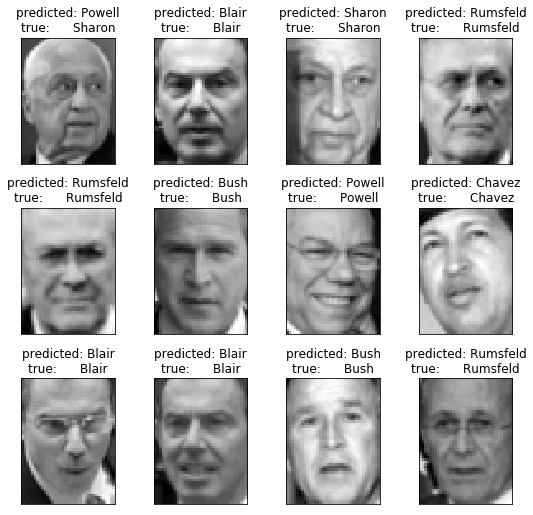

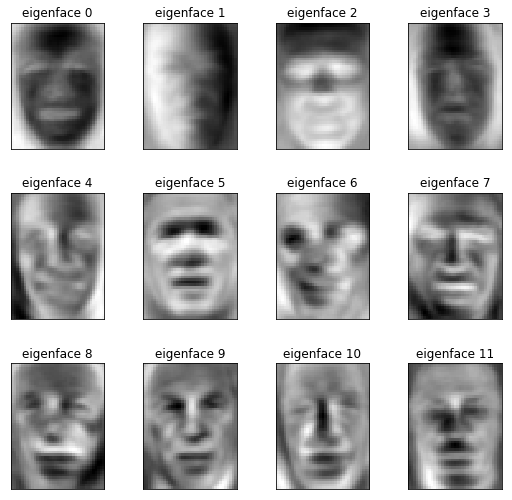

In [29]:
### YOUR CODE HERE - Plot predictions and some eigenfaces
# Get prediction titles using the title method
prediction_titles = [title(y_pred, test_y, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(test_X, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


### BONUS - Train 3 other classification algorithms on eigenfaces data

Congratulations on building your first classification algorithm using eigenfaces! As not algorithms perform as well on a given dataset, it's always great to build experience by comparing multiple algorithms using evaluation techniques such as cross-validation (as seen in the previous assignment). What algorithms work better, and why do you think so?

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python37\lib\si

LR: 0.8251181271477662 (0.03465590010646918)
LDA: 0.8241516323024054 (0.053639754440474856)
KNN: 0.6013960481099657 (0.03610275724712146)
CART: 0.42734106529209626 (0.04902267104961703)
RF: 0.5329574742268042 (0.05462459420852535)
NB: 0.6418170103092783 (0.0542870870535768)
SVM: 0.8551546391752577 (0.029558165351272626)


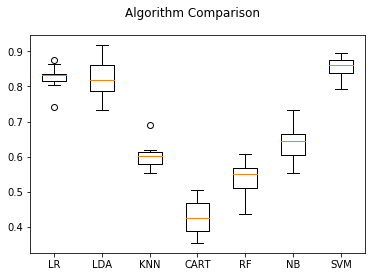

In [16]:
#######COPYRIGHT: ASSIGNMENT5##########
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Fix random seed in data partitions
seed = 7

# Prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))) #These are the "best params"
# Evaluate each model individually

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    
    kfold = model_selection.KFold(n_splits=10, random_state=seed)  # Provides train/test indices to split data in train/test sets.
    cv_results = model_selection.cross_val_score(model, train_X_trans, train_y, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())  # Provides the mean accuracy, std dev for results
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR performed well because it is a way to sep classes with a certain error by a single line/plane/hyperplane, which is similar to SVM. 
IDK what LDA is. 
For the rest, they are simply not suited for this analysis. 